### Dealing with Imbalanced Classes

#### Agenda
* What are imbalanced classes & their impact ?
* OverSampling
* UnderSampling
* Connecting Sampler to pipelines
* Making classification algorithm aware of Imbalance





### 1. Imbalanced Classes & Impact
* Data with skewed class distribution.
* Common examples are spam/ham mails, malicious/normal packets.
* Classification algorithms are prone to predict data with heavier class.
* accuracy_score is not the right matrix.
* We got to rely on matrices like confusion_matrix, recall, precision 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.metrics import confusion_matrix
from collections import Counter

In [2]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = 1.5
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

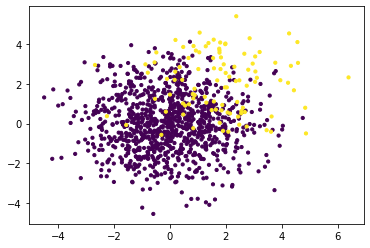

In [3]:
plt.scatter(X[:,0], X[:,1],s=10,c=y)

In [4]:
from sklearn.svm import SVC

In [5]:
svc = SVC(kernel='rbf', C = 100)

In [6]:
svc.fit(X,y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [8]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

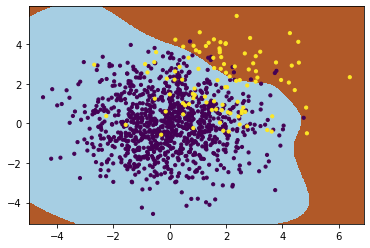

In [9]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

* As we can see, decision boundry is impacted
* imbalanced package provides many such sampling techniques - `pip install imbalanced-learn`

In [10]:
! pip install imbalanced-learn

### 2. OverSampling
* One way to fight this issue is to generate new samples in the classes which are under-represented. 
* The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples.
* RandomOverSampler is simpliest api to provide such functionality

#### RandomOverSampler

In [17]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                            n_redundant=0, n_repeated=0, n_classes=3,
                            n_clusters_per_class=1,
                            weights=[0.01, 0.05, 0.94],
                            class_sep=0.5, random_state=0)

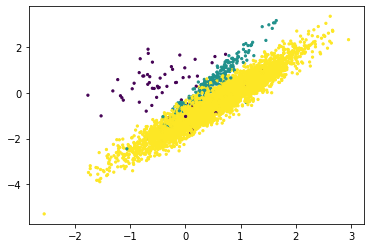

In [18]:
plt.scatter(X[:,0], X[:,1],s=5,c=y)

In [19]:
svc.fit(X,y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [21]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

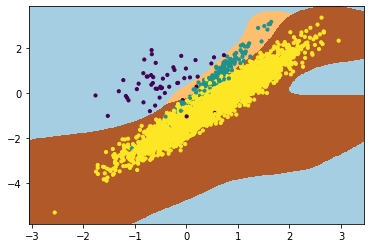

In [22]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [23]:
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [24]:
ros = RandomOverSampler(random_state=0)

In [25]:
X_resampled, y_resampled = ros.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


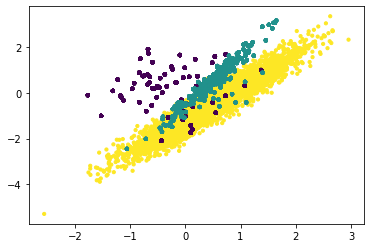

In [26]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [27]:
svc.fit(X_resampled,y_resampled)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

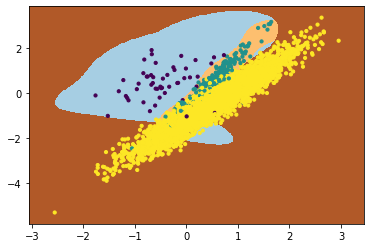

In [29]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [30]:
pred = svc.predict(X)
confusion_matrix(y_pred=pred, y_true=y)

array([[  48,    6,   10],
       [   1,  240,   21],
       [  99,  340, 4235]])

#### SMOTE (Synthetic Minority Oversampling Technique)
* Generates new samples by interpolation
* It doesn't duplicates data

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
X_resampled, y_resampled = SMOTE().fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


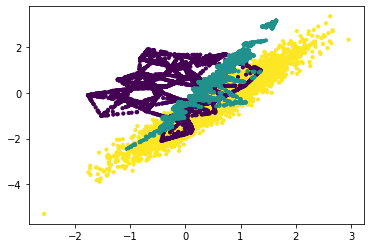

In [33]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [34]:
svc.fit(X_resampled,y_resampled)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

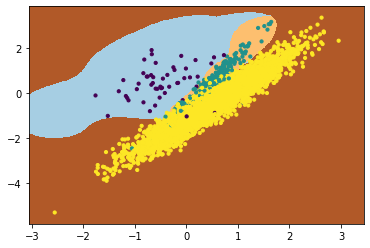

In [36]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [37]:
pred = svc.predict(X)
confusion_matrix(y_pred=pred, y_true=y)

array([[  46,    6,   12],
       [   3,  240,   19],
       [  39,  318, 4317]])

#### ADASYN (Adaptive Synthetic Sampling Method)
* Similar to SMOTE, this also generates data.
* Generate samples to the original which are wrongly mis-classified
* SMOTE doen't consider this situation

In [38]:
from imblearn.over_sampling import ADASYN

In [39]:
X_resampled, y_resampled = ADASYN().fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


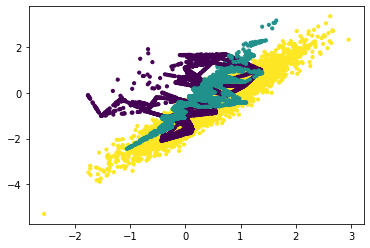

In [40]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [41]:
svc.fit(X_resampled,y_resampled)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

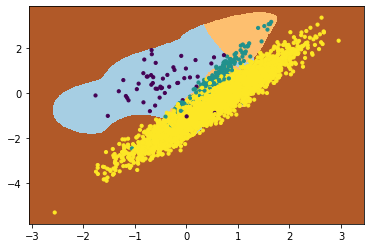

In [43]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [44]:
pred = svc.predict(X)
confusion_matrix(y_pred=pred, y_true=y)

array([[  54,    4,    6],
       [  27,  222,   13],
       [ 703,  452, 3519]])

### 3. Undersampling
* Reducing the data of the over-represented class

#### RandomUnderSampler
* The reduced data is picked randomly from the sample & not derived

In [45]:
from imblearn.under_sampling import RandomUnderSampler

In [46]:
rus = RandomUnderSampler(random_state=0)

In [47]:
X_resampled, y_resampled = rus.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


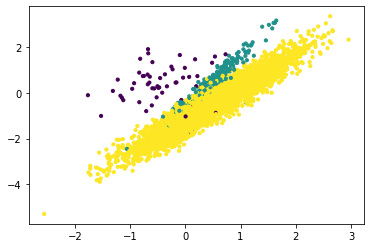

In [48]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

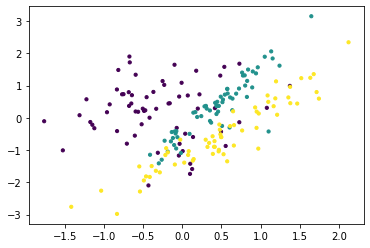

In [49]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [50]:
svc.fit(X_resampled,y_resampled)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

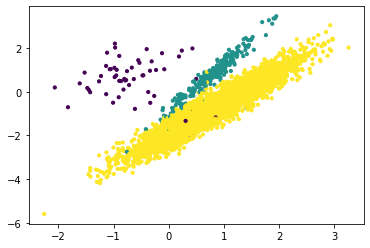

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

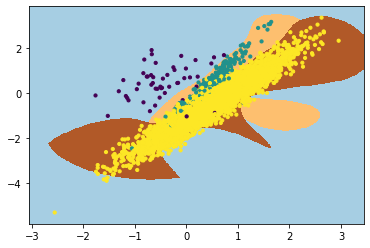

In [51]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [52]:
pred = svc.predict(X)
confusion_matrix(y_pred=pred, y_true=y)

array([[  48,    7,    9],
       [   0,  243,   19],
       [ 164,  532, 3978]])

In [ ]:
print(sorted(Counter(y).items()))

[(0, 64), (1, 262), (2, 4674)]


In [ ]:
print(sorted(Counter(y_resampled).items()))

[(0, 64), (1, 64), (2, 64)]


#### ClusterCentroid for data generation
* Generating representative data using kmeans
* Centroids of clusters are used

In [53]:
from imblearn.under_sampling import ClusterCentroids

In [54]:
cc = ClusterCentroids(random_state=0)

In [55]:
X_resampled, y_resampled = cc.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


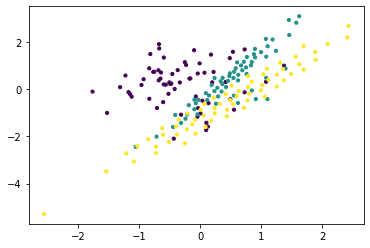

In [79]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [80]:
svc.fit(X_resampled,y_resampled)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

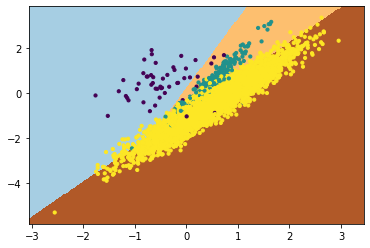

In [81]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

### 4. Connecting Sampler to Pipelines
* We can any of these sampler to be part of pipeline so that we can validate them
* scikit pipeline is not capable of dealing with samplers & we have to use overridden pipeline by imblearn

In [56]:
from imblearn.pipeline import make_pipeline

In [57]:
pipeline1 = make_pipeline(RandomOverSampler(),SVC(kernel='rbf'))

In [58]:
pipeline2 = make_pipeline(RandomUnderSampler(),SVC(kernel='rbf'))

In [59]:
pipelines = [pipeline1,pipeline2]

In [60]:
for pipeline in pipelines:
    pipeline.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [61]:
for sampling_type, pipeline in zip(['oversampler','undersampler'],pipelines):
    pred = pipeline.predict(X)
    print (sampling_type, '\n',confusion_matrix(y_pred=pred, y_true=y))
    print ('\n')

oversampler 
 [[  46    7   11]
 [   0  235   27]
 [   0  299 4375]]


undersampler 
 [[  42   10   12]
 [   8  223   31]
 [  33  346 4295]]




### 5. Making learning algorithms aware of class distribution
* Most of the classfication algorithms provides a method to pass class distribution information
* Internally, learning algorithm uses this & configures itself for justifying under represented class

In [62]:
from sklearn.svm import SVC

In [71]:
svc = SVC(kernel='rbf')

In [72]:
svc.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
pred = svc.predict(X)

In [74]:
confusion_matrix(y_pred=pred, y_true=y)

array([[  40,    6,   18],
       [   0,  155,  107],
       [   0,   17, 4657]])

In [75]:
svc = SVC(kernel='linear', class_weight='balanced')

In [76]:
svc.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
pred = svc.predict(X)

In [78]:
confusion_matrix(y_pred=pred, y_true=y)

array([[  42,   10,   12],
       [   1,  235,   26],
       [  75,  313, 4286]])